In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

pd.options.display.max_columns = None

# rendering all graphics straight out of the notebook
%matplotlib inline

In [2]:
#IMPORT DATA

df_spotify = pd.read_json('data/SpotifyData.json')
df_BL = pd.read_csv("data/brendan-spotify.csv")
df_NL = pd.read_csv("data/nick-spotify.csv")
df_BT = pd.read_csv("data/btam-spotify.csv")
df_DD = pd.read_csv("data/danica-spotify.csv")
df_TLC = pd.read_csv("data/toma-spotify.csv")

frames = [df_spotify, df_BL, df_NL, df_BT, df_DD, df_TLC]
df = pd.concat(frames).reset_index(drop=True)
df = df.drop_duplicates(subset=["track_name", "artist_name"])

# Remove the track popularity 0 and any prop out of range

df = df[df.popularity > 5]
df = df[df.valence < 1]
df = df[df.valence > 0]
df = df[df.energy < 1]
df = df[df.energy > 0]
df = df[df.danceability < 1]
df = df[df.danceability > 0]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16233 entries, 0 to 21716
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist_name       16233 non-null  object 
 1   track_name        16233 non-null  object 
 2   track_id          16233 non-null  object 
 3   popularity        16233 non-null  int64  
 4   danceability      16233 non-null  float64
 5   energy            16233 non-null  float64
 6   key               16233 non-null  float64
 7   loudness          16233 non-null  float64
 8   mode              16233 non-null  float64
 9   speechiness       16233 non-null  float64
 10  acousticness      16233 non-null  float64
 11  instrumentalness  16233 non-null  float64
 12  liveness          16233 non-null  float64
 13  valence           16233 non-null  float64
 14  tempo             16233 non-null  float64
 15  duration_ms       16233 non-null  float64
 16  time_signature    16233 non-null  float6

In [4]:
df.head(5)

,artist_name,track_name,track_id,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,Song,Artist,Genre,Year,added,bpm,dB,duration
0,24kGoldn,Mood (feat. iann dior),3tjFYV6RSFtuktYl3ZtYcq,99,0.700,0.722,7.0,-3.558,0.0,0.0369,0.221,0.0,0.2720,0.756,90.989,140526.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Ariana Grande,34+35,6Im9k8u9iIzKMrmV7BWtlF,97,0.830,0.585,0.0,-6.476,1.0,0.0940,0.237,0.0,0.2480,0.485,109.978,173711.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Ariana Grande,positions,35mvY5S1H3J2QZyna3TFe0,99,0.737,0.802,0.0,-4.771,1.0,0.0878,0.468,0.0,0.0931,0.682,144.015,172325.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,CJ,Whoopty,5vGLcdRuSbUhD8ScwsGSdA,96,0.711,0.598,3.0,-7.621,0.0,0.1820,0.190,0.0,0.1500,0.737,140.175,123429.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,The Kid LAROI,WITHOUT YOU,27OeeYzk6klgBh83TSvGMA,96,0.662,0.413,0.0,-7.357,1.0,0.0299,0.213,0.0,0.1340,0.467,93.005,161385.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# df.hist(figsize=(25,25))

c:\users\laibr\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


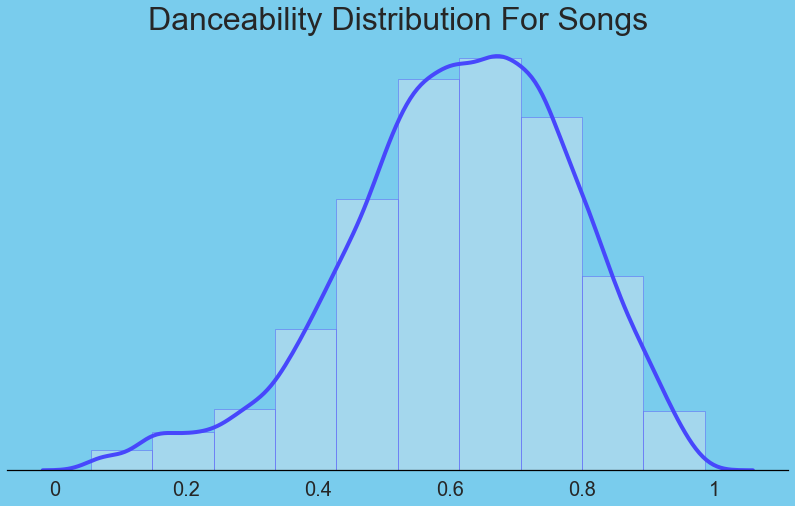

In [6]:
# # Density plot and histogram for the danceability
sns.set(font_scale=10)
sns.set_style("darkgrid", {'axes.grid': False})
sns.set(rc={'figure.figsize':(14,8), 
            'axes.facecolor':"#79cced",
            'figure.facecolor':"#79cced"
            , 'axes.grid': False
           })

x = sns.distplot(df["danceability"], hist=True, bins=int(50/5), color='#e5e8ee', hist_kws={'edgecolor': '#4747fc'},
                  kde=True, kde_kws={'linewidth':4, "color":"#4747fc"})

sns.despine(left=True);
plt.yticks([],[])
x.set_xticklabels([0, 0, 0.2, 0.4, 0.6, 0.8, 1], size=20)
x.spines['bottom'].set_color('black')

plt.xlabel("")
plt.ylabel("")
plt.title("Danceability Distribution For Songs", size=32)

plt.savefig("danceabilityDist.png") # Doesnt wrap the title and axis in the color palette for some reason

c:\users\laibr\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


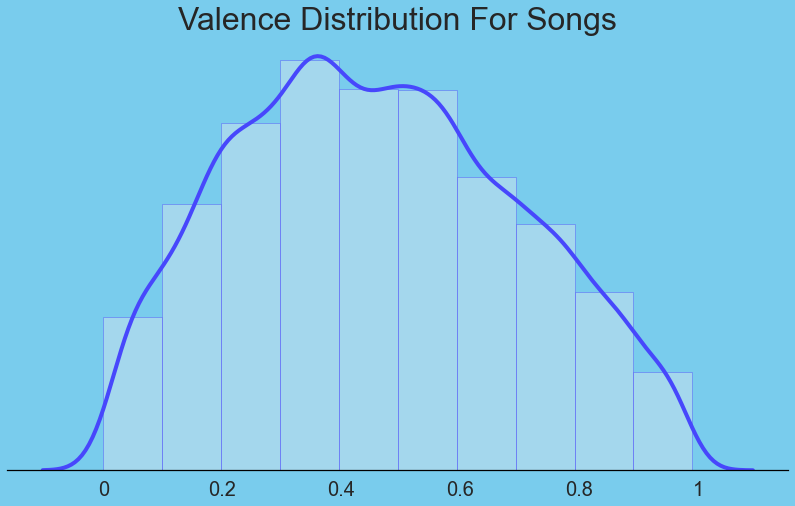

In [7]:
# # Density plot and histogram for the danceabilitysns.set(font_scale=10)
sns.set(font_scale=10)
sns.set_style("darkgrid", {'axes.grid': False})
sns.set(rc={'figure.figsize':(14,8), 
            'axes.facecolor':"#79cced",
            'figure.facecolor':"#79cced"
            , 'axes.grid': False
           })

x = sns.distplot(df["valence"], hist=True, bins=int(50/5), color='#e5e8ee', hist_kws={'edgecolor': '#4747fc'},
                  kde=True, kde_kws={'linewidth':4, "color":"#4747fc"})

sns.despine(left=True);
plt.yticks([],[])
x.set_xticklabels([0, 0, 0.2, 0.4, 0.6, 0.8, 1], size=20)
x.spines['bottom'].set_color('black')

plt.xlabel("")
plt.ylabel("")
plt.title("Valence Distribution For Songs", size=32)

plt.savefig("valenceDist.png") # Doesnt wrap the title and axis in the color palette for some reason

c:\users\laibr\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


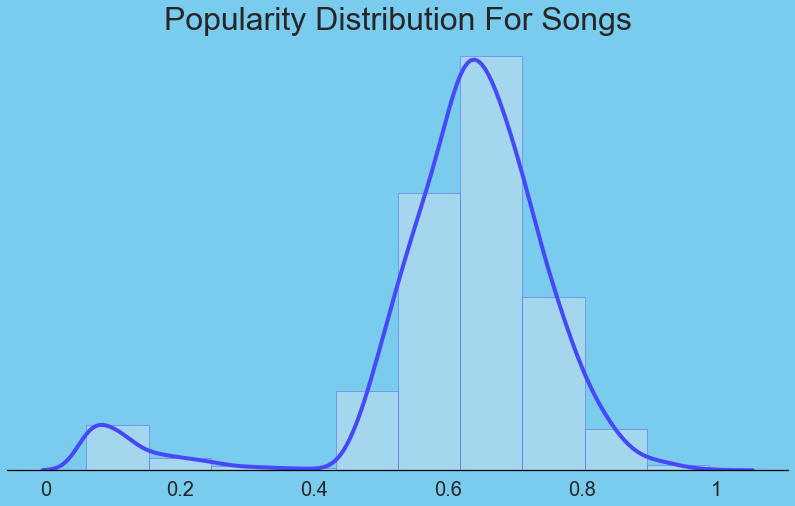

In [8]:
# # Density plot and histogram for the popularity
sns.set(font_scale=10)
sns.set_style("darkgrid", {'axes.grid': False})
sns.set(rc={'figure.figsize':(14,8), 
            'axes.facecolor':"#79cced",
            'figure.facecolor':"#79cced"
            , 'axes.grid': False
           })

x = sns.distplot(df["popularity"], hist=True, bins=int(50/5), color='#e5e8ee', hist_kws={'edgecolor': '#4747fc'},
                  kde=True, kde_kws={'linewidth':4, "color":"#4747fc"})

sns.despine(left=True);
plt.yticks([],[])
x.set_xticklabels([0, 0, 0.2, 0.4, 0.6, 0.8, 1], size=20)
x.spines['bottom'].set_color('black')

plt.xlabel("")
plt.ylabel("")
plt.title("Popularity Distribution For Songs", size=32)

plt.savefig("popularityDist.png") # Doesnt wrap the title and axis in the color palette for some reason

c:\users\laibr\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


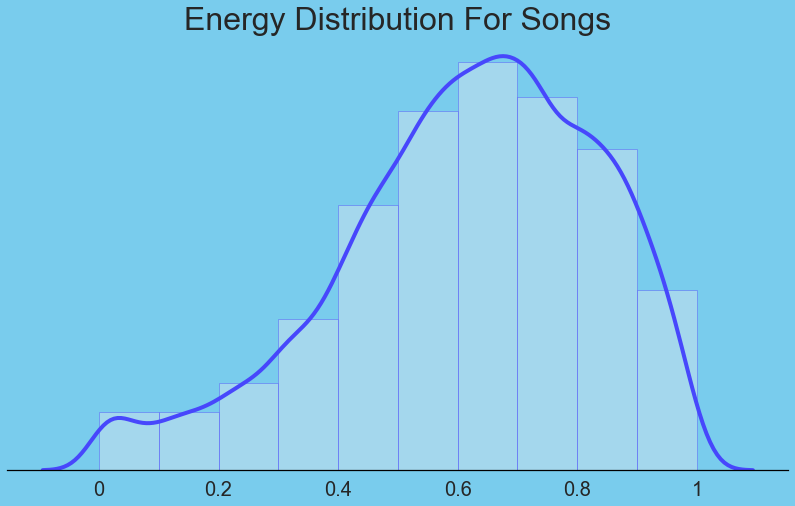

In [9]:
# # Density plot and histogram for the popularity
sns.set(font_scale=10)
sns.set_style("darkgrid", {'axes.grid': False})
sns.set(rc={'figure.figsize':(14,8), 
            'axes.facecolor':"#79cced",
            'figure.facecolor':"#79cced"
            , 'axes.grid': False
           })

x = sns.distplot(df["energy"], hist=True, bins=int(50/5), color='#e5e8ee', hist_kws={'edgecolor': '#4747fc'},
                  kde=True, kde_kws={'linewidth':4, "color":"#4747fc"})

sns.despine(left=True);
plt.yticks([],[])
x.set_xticklabels([0, 0, 0.2, 0.4, 0.6, 0.8, 1], size=20)
x.spines['bottom'].set_color('black')

plt.xlabel("")
plt.ylabel("")
plt.title("Energy Distribution For Songs", size=32)

plt.savefig("energyDist.png") # Doesnt wrap the title and axis in the color palette for some reason

c:\users\laibr\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


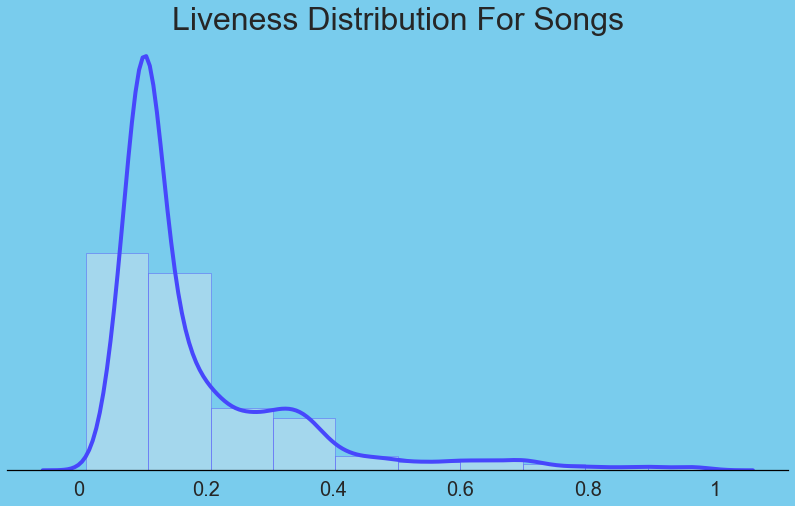

In [10]:
# # Density plot and histogram for the popularity
sns.set(font_scale=10)
sns.set_style("darkgrid", {'axes.grid': False})
sns.set(rc={'figure.figsize':(14,8), 
            'axes.facecolor':"#79cced",
            'figure.facecolor':"#79cced"
            , 'axes.grid': False
           })

x = sns.distplot(df["liveness"], hist=True, bins=int(50/5), color='#e5e8ee', hist_kws={'edgecolor': '#4747fc'},
                  kde=True, kde_kws={'linewidth':4, "color":"#4747fc"})

sns.despine(left=True);
plt.yticks([],[])
x.set_xticklabels([0, 0, 0.2, 0.4, 0.6, 0.8, 1], size=20)
x.spines['bottom'].set_color('black')

plt.xlabel("")
plt.ylabel("")
plt.title("Liveness Distribution For Songs", size=32)

plt.savefig("livenessDist.png") # Doesnt wrap the title and axis in the color palette for some reason

c:\users\laibr\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


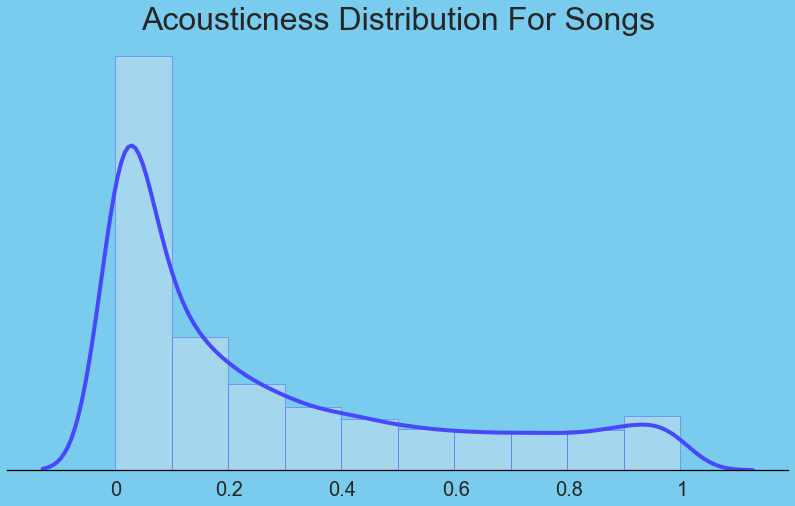

In [11]:
# # Density plot and histogram for the popularity
sns.set(font_scale=10)
sns.set_style("darkgrid", {'axes.grid': False})
sns.set(rc={'figure.figsize':(14,8), 
            'axes.facecolor':"#79cced",
            'figure.facecolor':"#79cced"
            , 'axes.grid': False
           })

x = sns.distplot(df["acousticness"], hist=True, bins=int(50/5), color='#e5e8ee', hist_kws={'edgecolor': '#4747fc'},
                  kde=True, kde_kws={'linewidth':4, "color":"#4747fc"})

sns.despine(left=True);
plt.yticks([],[])
x.set_xticklabels([0, 0, 0.2, 0.4, 0.6, 0.8, 1], size=20)
x.spines['bottom'].set_color('black')

plt.xlabel("")
plt.ylabel("")
plt.title("Acousticness Distribution For Songs", size=32)

plt.savefig("acousticnessDist.png") # Doesnt wrap the title and axis in the color palette for some reason

c:\users\laibr\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


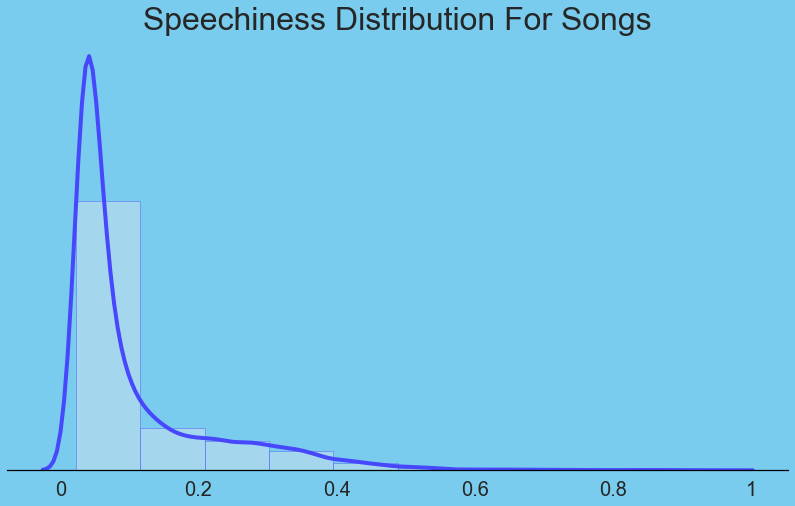

In [12]:
# # Density plot and histogram for the popularity
sns.set(font_scale=10)
sns.set_style("darkgrid", {'axes.grid': False})
sns.set(rc={'figure.figsize':(14,8), 
            'axes.facecolor':"#79cced",
            'figure.facecolor':"#79cced"
            , 'axes.grid': False
           })

x = sns.distplot(df["speechiness"], hist=True, bins=int(50/5), color='#e5e8ee', hist_kws={'edgecolor': '#4747fc'},
                  kde=True, kde_kws={'linewidth':4, "color":"#4747fc"})

sns.despine(left=True);
plt.yticks([],[])
x.set_xticklabels([0, 0, 0.2, 0.4, 0.6, 0.8, 1], size=20)
x.spines['bottom'].set_color('black')

plt.xlabel("")
plt.ylabel("")
plt.title("Speechiness Distribution For Songs", size=32)

plt.savefig("speechinessDist.png") # Doesnt wrap the title and axis in the color palette for some reason

c:\users\laibr\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


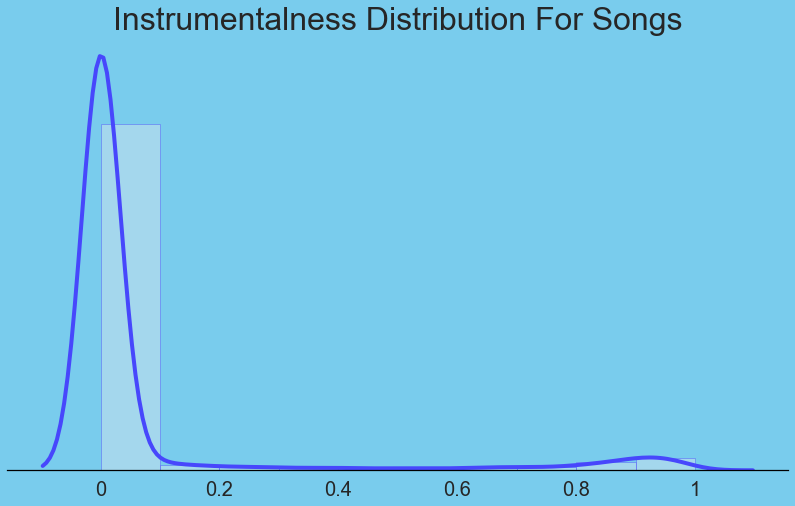

In [13]:
# # Density plot and histogram for the popularity
sns.set(font_scale=10)
sns.set_style("darkgrid", {'axes.grid': False})
sns.set(rc={'figure.figsize':(14,8), 
            'axes.facecolor':"#79cced",
            'figure.facecolor':"#79cced"
            , 'axes.grid': False
           })

x = sns.distplot(df["instrumentalness"], hist=True, bins=int(50/5), color='#e5e8ee', hist_kws={'edgecolor': '#4747fc'},
                  kde=True, kde_kws={'linewidth':4, "color":"#4747fc"})

sns.despine(left=True);
plt.yticks([],[])
x.set_xticklabels([0, 0, 0.2, 0.4, 0.6, 0.8, 1], size=20)
x.spines['bottom'].set_color('black')

plt.xlabel("")
plt.ylabel("")
plt.title("Instrumentalness Distribution For Songs", size=32)

plt.savefig("instrumentalnessDist.png") # Doesnt wrap the title and axis in the color palette for some reason